## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [3]:

# Import the necessary libraries
import pandas as pd

# Define the file paths -> wofür steht hier das f?
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (12103, 34)
Loaded Validation features dimensions: (3458, 34)
Loaded Test features dimensions: (1729, 34)

Loaded Training labels dimensions: (12103, 1)
Loaded Validation labels dimensions: (3458, 1)
Loaded Test labels dimensions: (1729, 1)

First few rows of loaded training features:
   bathrooms_0.5  bathrooms_0.75  bathrooms_1.0  bathrooms_1.25  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              1               0   

   bathrooms_1.5  bathrooms_1.75  bathrooms_2.0  bathrooms_2.25  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3     

In [4]:
# Convert DataFrames to numpy arrays -> muss anscheinend so sein für den weiteren Prozess
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column -> versteh ich nicht

# gibt die ersten 5 Zeilen aus -> sind ja jetzt dummy codiert
print("Training Features Array:")
print(training_features_array[:5])


Training Features Array:
[[   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1    0 2370]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0 2750]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0 1530]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0 3200]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0 1480]]


## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# defining model, input shape nimmt aus shape die Zweite Zahl (Zahl der Spalten)
model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_5           │ (None, 34)             │           136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535 (2.09 KB)

 Trainable params: 467 (1.82 KB)

 Non-trainable params: 68 (272.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [28]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=70,
                    validation_data=(validation_features, validation_labels))

Epoch 1/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 442251870208.0000 - val_loss: 429355761664.0000
Epoch 2/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 439198351360.0000 - val_loss: 429355433984.0000
Epoch 3/70


379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 441131139072.0000 - val_loss: 429355008000.0000
Epoch 4/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 419399630848.0000 - val_loss: 429354680320.0000
Epoch 5/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 445951180800.0000 - val_loss: 429354287104.0000
Epoch 6/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 440666980352.0000 - val_loss: 429353893888.0000
Epoch 7/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 429599293440.0000 - val_loss: 429353467904.0000
Epoch 8/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 436131856384.0000 - val_loss: 429353009152.0000
Epoch 9/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 431833907200.0000 - val_loss: 429352452096.0000
Epoch 10/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 427415994368.0000 - val_loss: 429352058880.0000
Epoch 11/70
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 415654117376.0000 - val_loss: 429351731200.0000
Epoch 12/70
379/379 ━━━━━━━━━━━━━━━━━

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [18]:
model.save("python_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

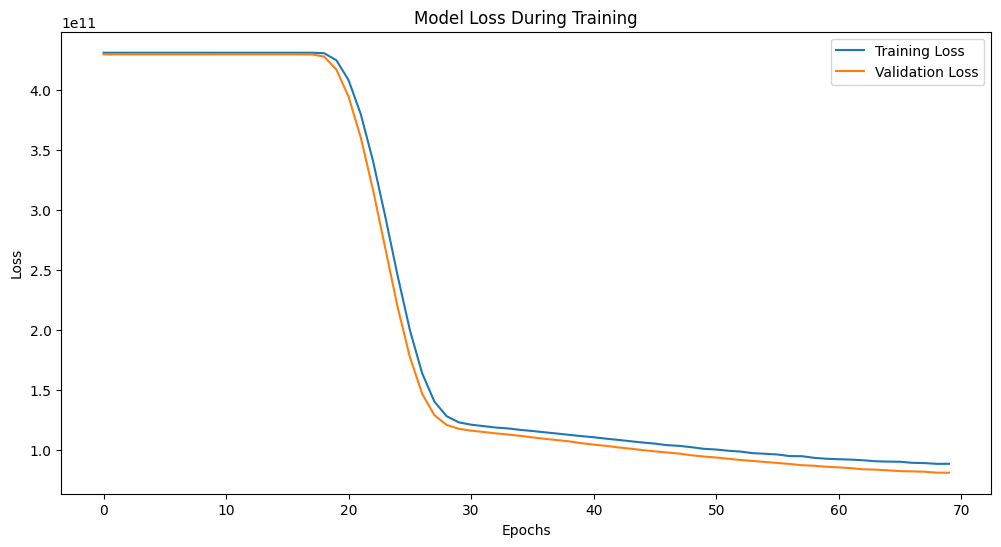

In [29]:
import matplotlib.pyplot as plt

# hier kann es hilfreich sein die visualisierung zu beschneiden, um den Verlauf besser zu sehen
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [30]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) # hier werden die Werte in Numpy Arrays überführt für die folgenden Berechnungen
    non_zero_mask = y_true != 0 # es wird eine Maske erstellt, die alle Werte ungleich 0 markiert um eine Division durch 0 zu verhindern
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%") # .2f heißt Gleitkommazahl mit zwei Dezimalstellen
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


  1/379 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step

379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
MAPE on the Training Data: 37.26%
MAPE on the Validation Data: 36.66%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


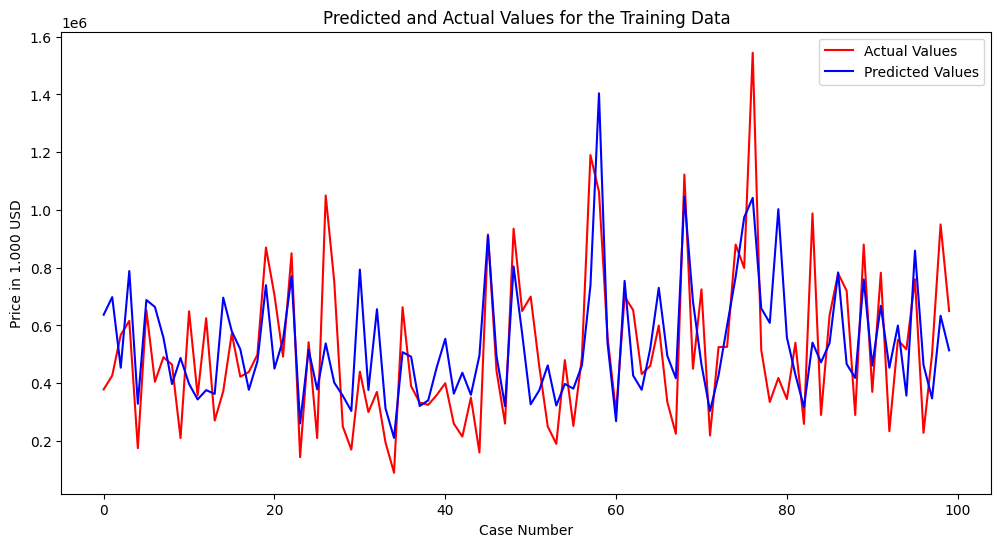

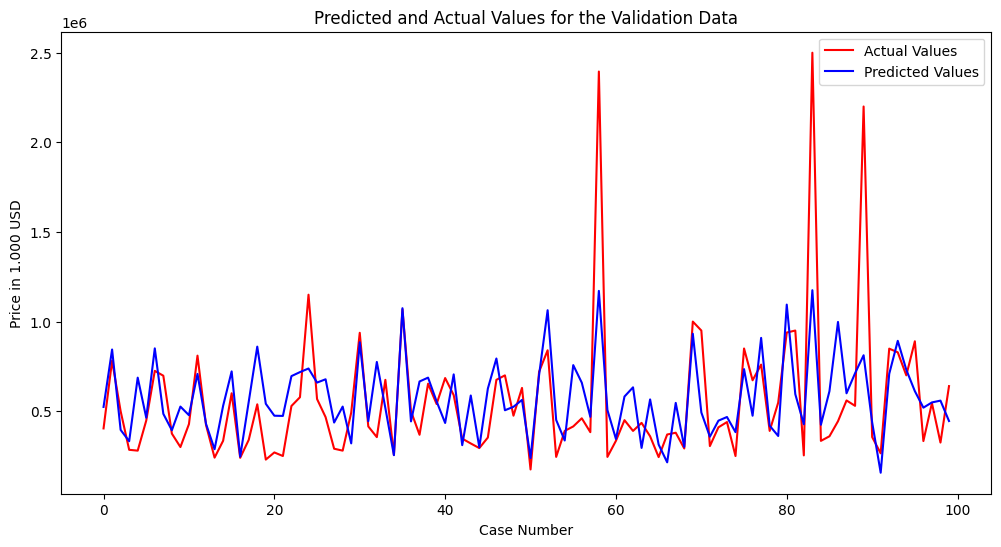

In [38]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten() # warum ist das flatten so wichtig? Anscheinend wichtig für weitere Berechnungen und damit alle das gleiche Format haben
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data') # weil alle Werte 12K wären lässt man sich als Übersicht nur die ersten 100 anzeigen
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')